In [1]:
import numpy as np                                              # operaciones numéricas (vectores/matrices).
import pandas as pd                                             # lectura y manipulación de tablas (DataFrame).
import seaborn as sns                                           # gráficos y visualización.
import matplotlib.pyplot as plt                                 # gráficos y visualización.

from sklearn.preprocessing import StandardScaler                # escalado (media 0, desviación 1) de features.
from sklearn.linear_model import LinearRegression               # modelo de regresión lineal ordinaria (OLS).
from sklearn.model_selection import train_test_split            # separar dataset en entrenamiento/validación.
from sklearn.metrics import mean_squared_error, r2_score        # métricas para evaluar regresión.

In [2]:
# Cargar dataset
df = pd.read_csv("./Datasets/winequality-red.csv", sep=";")              # este dataset esta separado por ";"
print(df.head())                                                # muestra las primeras filas para verificar que se cargó bien.

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

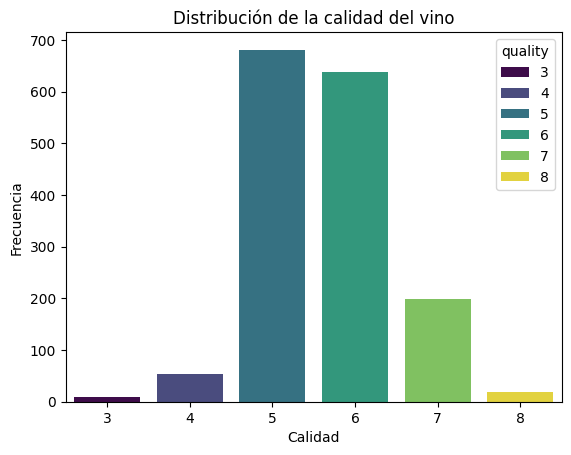

In [3]:
#Distribución de la variable objetivo (calidad del vino)
sns.countplot(x="quality", data=df, hue="quality", palette="viridis")
plt.title("Distribución de la calidad del vino")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.show()

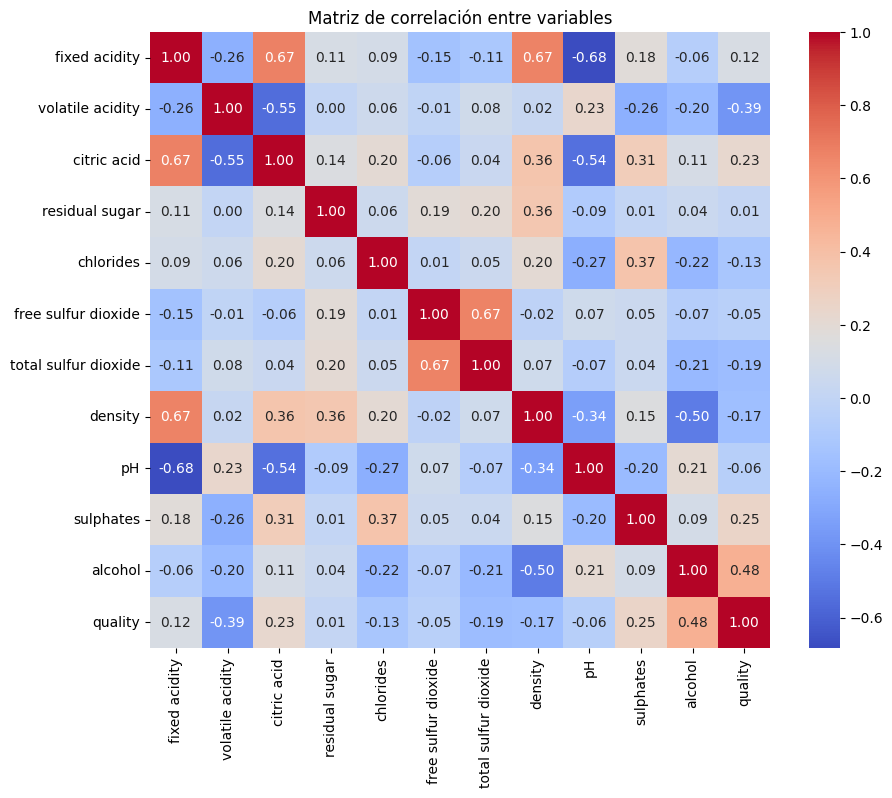

In [4]:
#Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

In [5]:
# 1. Modelo de cómputos con gradiente
X = df.drop("quality", axis=1).values                           # features
y = df["quality"].values.reshape(-1, 1)                         # target en columna

In [6]:
# 2. Escalar datos (muy importante para gradiente descendente)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 3. Agregar columna de 1s para el bias
m = X_scaled.shape[0]
X_b = np.c_[np.ones((m, 1)), X_scaled]

In [8]:
# 4. Inicialización de parámetros
n_features = X_b.shape[1]
theta = np.zeros((n_features, 1))                               # incluye bias
eta = 0.01                                                      # tasa de aprendizaje
n_iter = 1000                                                   # iteraciones

In [9]:
# 5. Gradiente descendente
for iteration in range(n_iter):
    gradients = (1/m) * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [10]:
# 6. Predicciones
y_pred = X_b @ theta

In [11]:
# 7. Métricas
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("\nResultados del modelo con gradiente descendente:")
print("Theta finales (bias + coeficientes):")
print(theta.ravel())
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Resultados del modelo con gradiente descendente:
Theta finales (bias + coeficientes):
[ 5.6357792   0.06170799 -0.18771198 -0.02630852  0.03067331 -0.08958595
  0.04495939 -0.1079882  -0.05749424 -0.0504479   0.15914227  0.27840208]
MSE: 0.4169
R²: 0.3604


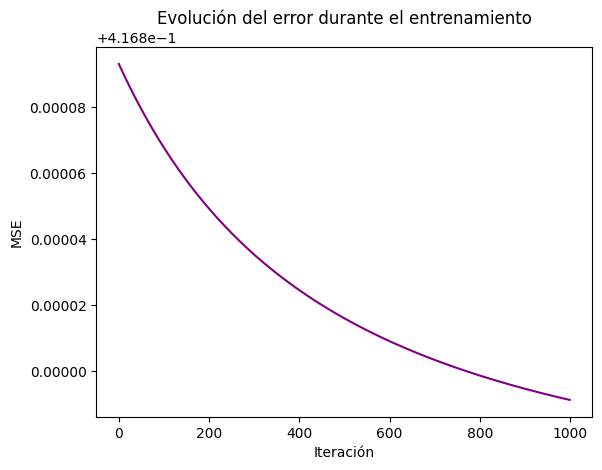

In [15]:
# Curva de error durante el entrenamiento

mse_history = []

for iteration in range(n_iter):
    gradients = (1/m) * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    mse_iter = mean_squared_error(y, X_b @ theta)
    mse_history.append(mse_iter)

plt.plot(mse_history, color="purple")
plt.xlabel("Iteración")
plt.ylabel("MSE")
plt.title("Evolución del error durante el entrenamiento")
plt.show()


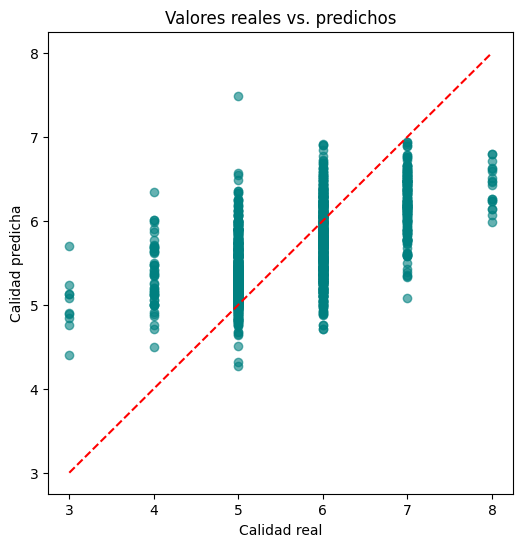

In [13]:
# Comparación entre valores reales y predichos
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.6, color="teal")
plt.xlabel("Calidad real")
plt.ylabel("Calidad predicha")
plt.title("Valores reales vs. predichos")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--") # línea ideal
plt.show()

/tmp/ipykernel_72479/1921392296.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Feature",


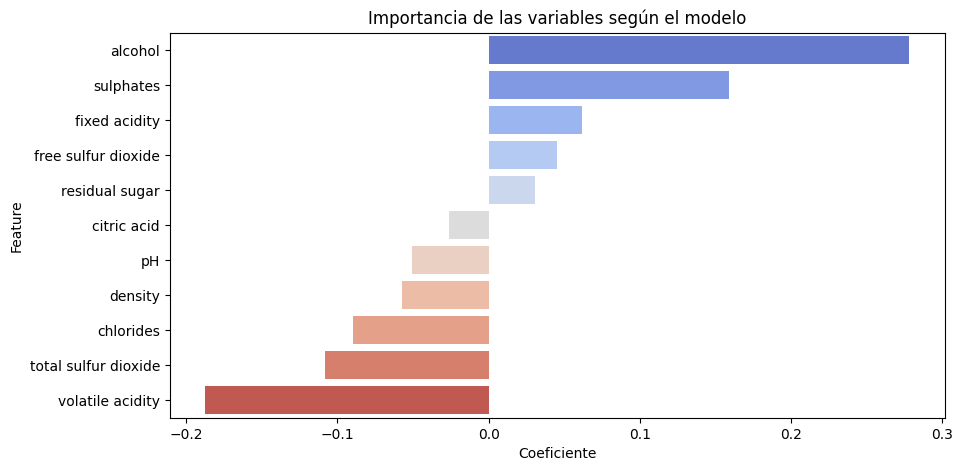

In [14]:
#Importancia de variables (coeficientes)
coef = theta[1:].ravel() # excluye bias
features = df.drop("quality", axis=1).columns
coef_df = pd.DataFrame({"Feature": features, "Coeficiente": coef})

plt.figure(figsize=(10,5))
sns.barplot(x="Coeficiente", y="Feature",
data=coef_df.sort_values(by="Coeficiente", ascending=False),
palette="coolwarm")
plt.title("Importancia de las variables según el modelo")
plt.show()